In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd

df = pd.DataFrame.from_csv('diamondsbig.csv')

In [7]:
df.columns

Index([u'carat', u'cut', u'color', u'clarity', u'table', u'depth', u'cert',
       u'measurements', u'price', u'x', u'y', u'z'],
      dtype='object')

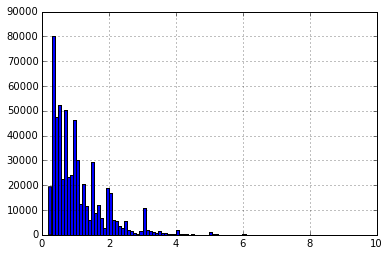

In [19]:
df['carat'].hist(bins=100)